# About

try to extract features from address

* street
* is_intersection
* etc

see Linda's code

see the usaddress libray

* https://usaddress.readthedocs.io/en/latest/

In [36]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder

%reload_ext autoreload
%autoreload 2
import src.features.build_features as bf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loads data
train_pd = pd.read_csv("../data/raw/train.csv.zip", compression="zip")
test_pd = pd.read_csv("../data/raw/test.csv.zip", compression="zip")
sample_submissions = pd.read_csv("../data/raw/sampleSubmission.csv.zip", compression="zip")

In [3]:
# shuffles the train and test dataframes
train_data, train_labels, dev_data, dev_labels, test_data, test_ids = bf.prep_data(train_pd, test_pd, dev_size = 0.2)

In [4]:
print("================")
print(type(train_data))
print(train_data.columns)
print(train_data.shape)
print(type(train_labels))
print(train_labels.shape)

print("================")
print(type(dev_data))
print(dev_data.columns)
print(dev_data.shape)
print(type(dev_labels))
print(dev_labels.shape)

print("================")
print(type(test_data))
print(test_data.columns)
print(test_data.shape)
print(type(test_ids))
print(test_ids.shape)

<class 'pandas.core.frame.DataFrame'>
Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')
(702439, 6)
<class 'pandas.core.series.Series'>
(702439,)
<class 'pandas.core.frame.DataFrame'>
Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')
(175610, 6)
<class 'pandas.core.series.Series'>
(175610,)
<class 'pandas.core.frame.DataFrame'>
Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')
(884262, 6)
<class 'pandas.core.series.Series'>
(884262,)


In [17]:
# # extract some more features using our custom transformer
# sfcc = bf.SFCCTransformer()

# pipe = Pipeline([
#     ("transformer", sfcc)
# ])

# train_data = pipe.transform(train_data)
# dev_data = pipe.transform(dev_data)
# test_data = pipe.transform(test_data)

In [18]:
# print("================")
# print(type(train_data))
# print(list(train_data.columns))
# print(train_data.shape)
# print(type(train_labels))
# print(train_labels.shape)

# print("================")
# print(type(dev_data))
# print(list(dev_data.columns))
# print(dev_data.shape)
# print(type(dev_labels))
# print(dev_labels.shape)

# print("================")
# print(type(test_data))
# print(list(test_data.columns))
# print(test_data.shape)
# print(type(test_ids))
# print(test_ids.shape)

<class 'pandas.core.frame.DataFrame'>
['X', 'Y', 'pdd_BAYVIEW', 'pdd_CENTRAL', 'pdd_INGLESIDE', 'pdd_MISSION', 'pdd_NORTHERN', 'pdd_PARK', 'pdd_RICHMOND', 'pdd_SOUTHERN', 'pdd_TARAVAL', 'pdd_TENDERLOIN', 'dow_Friday', 'dow_Monday', 'dow_Saturday', 'dow_Sunday', 'dow_Thursday', 'dow_Tuesday', 'dow_Wednesday', 'hour_delta', 'day_delta', 'week_delta', 'month_delta', 'year_delta', 'is_weekend', 'is_holiday', 'is_latenight', 'hod_0', 'hod_1', 'hod_2', 'hod_3', 'hod_4', 'hod_5', 'hod_6', 'hod_7', 'hod_8', 'hod_9', 'hod_10', 'hod_11', 'hod_12', 'hod_13', 'hod_14', 'hod_15', 'hod_16', 'hod_17', 'hod_18', 'hod_19', 'hod_20', 'hod_21', 'hod_22', 'hod_23', 'dom_1', 'dom_2', 'dom_3', 'dom_4', 'dom_5', 'dom_6', 'dom_7', 'dom_8', 'dom_9', 'dom_10', 'dom_11', 'dom_12', 'dom_13', 'dom_14', 'dom_15', 'dom_16', 'dom_17', 'dom_18', 'dom_19', 'dom_20', 'dom_21', 'dom_22', 'dom_23', 'dom_24', 'dom_25', 'dom_26', 'dom_27', 'dom_28', 'dom_29', 'dom_30', 'dom_31', 'woy_2', 'woy_4', 'woy_6', 'woy_8', 'woy_10',

Our data is the REPORTED crimes, so there will be alot of crimes marked for where they were reported

NOT where they were actually committed

not entirely sure if this matters to predictions

e.g. 800 Block of BRYANT ST has 26533 reported crimes. It is a police station.

# Top 10 addresses

In [5]:
train_pd.Address.value_counts()[0:10]

800 Block of BRYANT ST      26533
800 Block of MARKET ST       6581
2000 Block of MISSION ST     5097
1000 Block of POTRERO AV     4063
900 Block of MARKET ST       3251
0 Block of TURK ST           3228
0 Block of 6TH ST            2884
300 Block of ELLIS ST        2703
400 Block of ELLIS ST        2590
16TH ST / MISSION ST         2504
Name: Address, dtype: int64

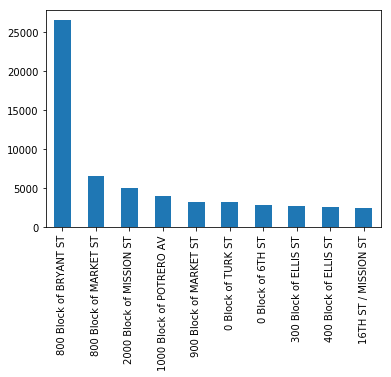

In [18]:
train_pd.Address.value_counts()[0:10].plot.bar()

# Addresses-based Features

* single address, block of
* intersection of 2 streets, with /
* street 1 vs street 2

In [5]:
addr = train_pd[["Category", "Address"]].copy()

## is_intersection

looks like roughly about double the crimes happened at non-intersections

In [6]:
addr["is_intersection"] = 0
addr.loc[addr.Address.str.contains("/", regex = False), "is_intersection"] = 1

In [31]:
addr[["Category", "Address", "is_intersection"]].query("is_intersection == 1").sample(30, random_state = 0)

,Category,Address,is_intersection
376010,OTHER OFFENSES,GEARY ST / POWELL ST,1
404667,OTHER OFFENSES,MISSION ST / 30TH ST,1
13227,NON-CRIMINAL,BALBOA ST / 10TH AV,1
397843,OTHER OFFENSES,ELLIS ST / JONES ST,1
468693,OTHER OFFENSES,NEWHALL ST / REVERE AV,1
370549,LARCENY/THEFT,BRANNAN ST / 6TH ST,1
403501,OTHER OFFENSES,23RD ST / SOUTH VAN NESS AV,1
223081,ROBBERY,SPOFFORD LN / WASHINGTON ST,1
236201,LARCENY/THEFT,HAIGHT ST / LAGUNA ST,1
713781,LARCENY/THEFT,BRANNAN ST / 5TH ST,1


In [15]:
addr.is_intersection.value_counts()

0    617231
1    260818
Name: is_intersection, dtype: int64

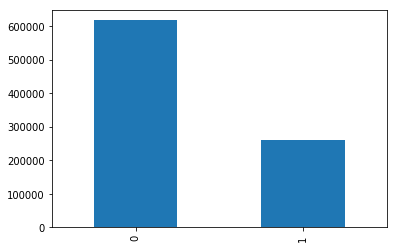

In [16]:
addr.is_intersection.value_counts().plot.bar()

## block of

In [7]:
addr["is_blockof"] = 0
addr.loc[addr.Address.str.contains("Block of", regex = False), "is_blockof"] = 1

In [30]:
addr[["Category", "Address", "is_blockof"]].query("is_blockof == 1").sample(30, random_state = 0)

,Category,Address,is_blockof
482736,BURGLARY,0 Block of TURK ST,1
363157,NON-CRIMINAL,0 Block of MURRAY ST,1
522952,VEHICLE THEFT,1100 Block of JACKSON ST,1
858980,OTHER OFFENSES,700 Block of MARKET ST,1
582527,ASSAULT,1300 Block of JUDAH ST,1
786014,VANDALISM,800 Block of BRYANT ST,1
629469,NON-CRIMINAL,1600 Block of FELL ST,1
787713,DRUG/NARCOTIC,0 Block of OCEAN AV,1
175583,LARCENY/THEFT,500 Block of 3RD ST,1
615167,DRUG/NARCOTIC,1300 Block of BUSH ST,1


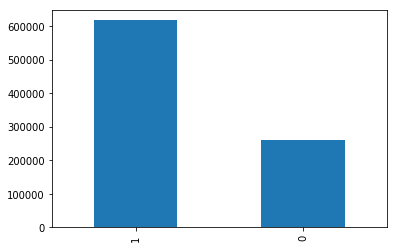

In [8]:
addr.is_blockof.value_counts().plot.bar()

Looks like all addresses are either at intersection, of is block of

In [9]:
addr[["is_blockof", "is_intersection"]].groupby(["is_blockof", "is_intersection"]).size()

is_blockof  is_intersection
0           1                  260818
1           0                  617231
dtype: int64

Do different kinds of crime happen at intersection vs streets?

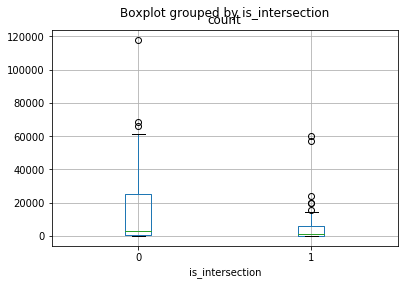

In [20]:
temp = addr[["is_intersection", "Category"]].groupby(["is_intersection", "Category"]).size().reset_index(name = "count")
temp.boxplot(column = "count", by = "is_intersection")

## Address suffix

Probably not useful on their own, since the specific address or block will probably be much more important than what the city historicaly chose to classify the block as.

Looks there are some oddly coded streets, such as

* intersections that doesn't have a second street, ends with /
    + but there's only four of them, so easy to correct

In [38]:
addr["addr_suffix"] = addr.Address.str[-3:]

In [39]:
addr.addr_suffix.value_counts()

 ST    656309
 AV    164255
 BL     19407
 DR     13505
 WY      6450
 RD      3939
 CT      3125
 HY      2532
 PZ      2349
 LN      1821
 TR      1376
 PL      1363
 CR       431
 AL       361
-80       322
WAY       168
TER        94
LMS        87
HWY        73
MAR        22
TWY        16
 EX        14
ARK         9
ANO         5
 WK         5
TTI         4
T /         3
280         2
V /         1
 RW         1
Name: addr_suffix, dtype: int64

In [46]:
for s in np.unique(addr.addr_suffix):
    print(addr[["Category", "Address", "addr_suffix"]].query("addr_suffix == @s").sample(10, random_state = 0, replace = True))

              Category                    Address addr_suffix
501975  OTHER OFFENSES    MISSION ST / CLARION AL          AL
169773   DRUG/NARCOTIC    MISSION ST / CLARION AL          AL
359716    NON-CRIMINAL  0 Block of BOB KAUFMAN AL          AL
552055   LARCENY/THEFT  0 Block of JACK LONDON AL          AL
827371  OTHER OFFENSES         MINNA ST / SHAW AL          AL
710112  OTHER OFFENSES    MISSION ST / CLARION AL          AL
560841  OTHER OFFENSES    MISSION ST / CLARION AL          AL
874707  SUSPICIOUS OCC         0 Block of CARD AL          AL
32413          ASSAULT         0 Block of CARD AL          AL
620710  OTHER OFFENSES        COSMO PL / OPHIR AL          AL
                 Category                       Address addr_suffix
234582           BURGLARY      2000 Block of QUESADA AV          AV
632581      LARCENY/THEFT            3RD ST / EGBERT AV          AV
813950            ASSAULT  500 Block of PENNSYLVANIA AV          AV
514635      LARCENY/THEFT          300 Block o

         Category                Address addr_suffix
454479  VANDALISM  0 Block of COTTAGE RW          RW
454479  VANDALISM  0 Block of COTTAGE RW          RW
454479  VANDALISM  0 Block of COTTAGE RW          RW
454479  VANDALISM  0 Block of COTTAGE RW          RW
454479  VANDALISM  0 Block of COTTAGE RW          RW
454479  VANDALISM  0 Block of COTTAGE RW          RW
454479  VANDALISM  0 Block of COTTAGE RW          RW
454479  VANDALISM  0 Block of COTTAGE RW          RW
454479  VANDALISM  0 Block of COTTAGE RW          RW
454479  VANDALISM  0 Block of COTTAGE RW          RW
              Category                      Address addr_suffix
407768   LARCENY/THEFT     100 Block of GARFIELD ST          ST
580604   VEHICLE THEFT        GUERRERO ST / 20TH ST          ST
157119   LARCENY/THEFT        MISSOURI ST / 17TH ST          ST
202973         ASSAULT  6100 Block of CALIFORNIA ST          ST
479268  OTHER OFFENSES     100 Block of MCCOPPIN ST          ST
405731  OTHER OFFENSES       800 

769674        WARRANTS      TEHAMA ST /         T /
              Category                       Address addr_suffix
492457   LARCENY/THEFT  100 Block of BUENA VISTA TER         TER
516476        BURGLARY    0 Block of BUENA VISTA TER         TER
632025        BURGLARY  100 Block of BUENA VISTA TER         TER
646992        BURGLARY    0 Block of BUENA VISTA TER         TER
646992        BURGLARY    0 Block of BUENA VISTA TER         TER
145058   LARCENY/THEFT  100 Block of BUENA VISTA TER         TER
806197   VEHICLE THEFT    0 Block of BUENA VISTA TER         TER
248839   LARCENY/THEFT  100 Block of BUENA VISTA TER         TER
438371  OTHER OFFENSES  100 Block of BUENA VISTA TER         TER
821974         ASSAULT    0 Block of BUENA VISTA TER         TER
             Category                      Address addr_suffix
92891        BURGLARY  0 Block of VIA FERLINGHETTI         TTI
863352        ASSAULT  0 Block of VIA FERLINGHETTI         TTI
92892   VEHICLE THEFT  0 Block of VIA FERLIN

In [48]:
addr[addr.Address.str.endswith("/")]

,Category,Address,is_intersection,is_blockof,addr_suffix
769674,WARRANTS,TEHAMA ST /,1,0,T /
769675,OTHER OFFENSES,TEHAMA ST /,1,0,T /
828322,FORGERY/COUNTERFEITING,GENEVA AV /,1,0,V /
877289,LARCENY/THEFT,CLEMENTINA ST /,1,0,T /


# Addr_Clean

## extract streets and intersections

1. fix the intersections that only have a single street
2. we want the address or intersection itself as a feature, onehot
3. we want 
we probably also want the blockof streets themselves as a feature, also one hot

we probably also want the intersections themselves as a feature, also one hot

In [142]:
addr["addr_clean"] = addr.Address
addr.loc[addr.addr_clean.str.endswith("/"), "addr_clean"] = addr.Address.str[:-2]

In [144]:
addr[["Category", "Address", "addr_clean"]][addr.Address.str.endswith("/")]

,Category,Address,addr_clean
769674,WARRANTS,TEHAMA ST /,TEHAMA ST
769675,OTHER OFFENSES,TEHAMA ST /,TEHAMA ST
828322,FORGERY/COUNTERFEITING,GENEVA AV /,GENEVA AV
877289,LARCENY/THEFT,CLEMENTINA ST /,CLEMENTINA ST


In [145]:
addr[["Category", "Address", "addr_clean"]].sample(10)

,Category,Address,addr_clean
344326,OTHER OFFENSES,DUBOCE AV / MISSION ST,DUBOCE AV / MISSION ST
28820,BURGLARY,1300 Block of CALIFORNIA ST,1300 Block of CALIFORNIA ST
708638,MISSING PERSON,0 Block of 3RD ST,0 Block of 3RD ST
252447,ROBBERY,TURK ST / TAYLOR ST,TURK ST / TAYLOR ST
94368,NON-CRIMINAL,1600 Block of ANZA ST,1600 Block of ANZA ST
718044,LARCENY/THEFT,800 Block of BRYANT ST,800 Block of BRYANT ST
169318,OTHER OFFENSES,OFARRELL ST / POWELL ST,OFARRELL ST / POWELL ST
501233,MISSING PERSON,1400 Block of PHELPS ST,1400 Block of PHELPS ST
515285,ASSAULT,1000 Block of MARKET ST,1000 Block of MARKET ST
856083,FRAUD,1800 Block of BROADWAY ST,1800 Block of BROADWAY ST


In [159]:
# streets = addr.addr_clean.str.split("/", expand = True)
# addr.loc[addr.addr_clean.str.contains("/"), "street1"] = streets[0]
# addr.loc[addr.addr_clean.str.contains("/"), "street2"] = streets[1]

# streets = addr.addr_clean.str.split("Block of ", expand = True)
# addr.loc[addr.addr_clean.str.contains("Block of "), "street1"] = streets[1]
# # addr.loc[addr.addr_clean.str.contains("Block of "), "street2"] = streets[1]

In [157]:
streets[0:10]

,0,1
0,OAK ST / LAGUNA ST,None
1,OAK ST / LAGUNA ST,None
2,VANNESS AV / GREENWICH ST,None
3,1500,LOMBARD ST
4,100,BRODERICK ST
5,0,TEDDY AV
6,AVALON AV / PERU AV,None
7,KIRKWOOD AV / DONAHUE ST,None
8,600,47TH AV
9,JEFFERSON ST / LEAVENWORTH ST,None


In [160]:
addr[["Category", "Address", "addr_clean", "street1", "street2"]].head()

,Category,Address,addr_clean,street1,street2
0,WARRANTS,OAK ST / LAGUNA ST,OAK ST / LAGUNA ST,OAK ST,LAGUNA ST
1,OTHER OFFENSES,OAK ST / LAGUNA ST,OAK ST / LAGUNA ST,OAK ST,LAGUNA ST
2,OTHER OFFENSES,VANNESS AV / GREENWICH ST,VANNESS AV / GREENWICH ST,VANNESS AV,GREENWICH ST
3,LARCENY/THEFT,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST,LOMBARD ST,NaN
4,LARCENY/THEFT,100 Block of BRODERICK ST,100 Block of BRODERICK ST,BRODERICK ST,NaN


## sampling of addresses per Category

In [23]:
cats = addr.Category.unique()

for cat in cats:
    print("=================")
    print(cat)
    print(addr.query("Category == @cat").Address.value_counts()[0:10])

WARRANTS
800 Block of BRYANT ST      1719
2000 Block of MISSION ST     567
800 Block of MARKET ST       477
0 Block of TURK ST           392
1000 Block of POTRERO AV     322
900 Block of MARKET ST       310
0 Block of 6TH ST            303
300 Block of ELLIS ST        268
400 Block of ELLIS ST        251
100 Block of 6TH ST          241
Name: Address, dtype: int64
OTHER OFFENSES
800 Block of BRYANT ST      3019
2000 Block of MISSION ST    1209
16TH ST / MISSION ST         673
0 Block of TURK ST           565
800 Block of MARKET ST       562
MISSION ST / 16TH ST         533
400 Block of ELLIS ST        500
TURK ST / TAYLOR ST          471
900 Block of MARKET ST       459
300 Block of ELLIS ST        438
Name: Address, dtype: int64
LARCENY/THEFT
800 Block of BRYANT ST          6144
800 Block of MARKET ST          3256
100 Block of OFARRELL ST        1098
3200 Block of 20TH AV           1015
700 Block of MARKET ST           863
2000 Block of MARKET ST          753
0 Block of PHELAN AV    

Name: Address, dtype: int64
SEX OFFENSES FORCIBLE
800 Block of BRYANT ST          296
1000 Block of POTRERO AV         59
3400 Block of 17TH ST            37
0 Block of 6TH ST                27
800 Block of MARKET ST           19
16TH ST / MISSION ST             16
0 Block of PHELAN AV             16
600 Block of OFARRELL ST         16
500 Block of JOHNFKENNEDY DR     15
400 Block of EDDY ST             15
Name: Address, dtype: int64
PROSTITUTION
ELLIS ST / HYDE ST        422
17TH ST / SHOTWELL ST     353
19TH ST / SHOTWELL ST     350
POST ST / LARKIN ST       250
SUTTER ST / LARKIN ST     231
20TH ST / CAPP ST         209
16TH ST / SHOTWELL ST     209
HEMLOCK ST / LARKIN ST    173
SHOTWELL ST / 17TH ST     153
18TH ST / FOLSOM ST       152
Name: Address, dtype: int64
DISORDERLY CONDUCT
1000 Block of POTRERO AV       104
0 Block of GROVE ST            102
300 Block of ELLIS ST           85
800 Block of BRYANT ST          76
100 Block of GOLDEN GATE AV     43
SHOTWELL ST / 17TH ST      

In [21]:
cats = addr.Category.unique()

for cat in cats:
    print(addr.query("Category == @cat").head(10))

     Category                   Address  is_intersection  is_blockof
0    WARRANTS        OAK ST / LAGUNA ST                1           0
22   WARRANTS     100 Block of JONES ST                0           1
66   WARRANTS      400 Block of HYDE ST                0           1
67   WARRANTS      400 Block of HYDE ST                0           1
75   WARRANTS  1900 Block of MISSION ST                0           1
76   WARRANTS  1900 Block of MISSION ST                0           1
116  WARRANTS  EDDY ST / LEAVENWORTH ST                1           0
117  WARRANTS  EDDY ST / LEAVENWORTH ST                1           0
140  WARRANTS        4TH ST / MARKET ST                1           0
143  WARRANTS     STOCKTON ST / BUSH ST                1           0
          Category                      Address  is_intersection  is_blockof
1   OTHER OFFENSES           OAK ST / LAGUNA ST                1           0
2   OTHER OFFENSES    VANNESS AV / GREENWICH ST                1           0
11  OTHER 

                    Category                   Address  is_intersection  \
102   FORGERY/COUNTERFEITING   1200 Block of MARKET ST                0   
103   FORGERY/COUNTERFEITING   1200 Block of MARKET ST                0   
136   FORGERY/COUNTERFEITING  400 Block of CORTLAND AV                0   
647   FORGERY/COUNTERFEITING   500 Block of SANSOME ST                0   
723   FORGERY/COUNTERFEITING  2100 Block of MISSION ST                0   
843   FORGERY/COUNTERFEITING    800 Block of MARKET ST                0   
2119  FORGERY/COUNTERFEITING      600 Block of 43RD AV                0   
2240  FORGERY/COUNTERFEITING   1700 Block of EGBERT AV                0   
2249  FORGERY/COUNTERFEITING   1700 Block of EGBERT AV                0   
2410  FORGERY/COUNTERFEITING    900 Block of MARKET ST                0   

      is_blockof  
102            1  
103            1  
136            1  
647            1  
723            1  
843            1  
2119           1  
2240           1  
224

5176                1           0  
                   Category                   Address  is_intersection  \
375   SEX OFFENSES FORCIBLE    200 Block of KEARNY ST                0   
376   SEX OFFENSES FORCIBLE    200 Block of KEARNY ST                0   
693   SEX OFFENSES FORCIBLE      16TH ST / MISSION ST                1   
834   SEX OFFENSES FORCIBLE    1900 Block of GEARY BL                0   
915   SEX OFFENSES FORCIBLE     500 Block of JONES ST                0   
1045  SEX OFFENSES FORCIBLE  1000 Block of POTRERO AV                0   
1066  SEX OFFENSES FORCIBLE   1000 Block of HOWARD ST                0   
1176  SEX OFFENSES FORCIBLE   100 Block of STEUART ST                0   
1192  SEX OFFENSES FORCIBLE   1700 Block of MARKET ST                0   
1306  SEX OFFENSES FORCIBLE  1500 Block of MISSION ST                0   

      is_blockof  
375            1  
376            1  
693            0  
834            1  
915            1  
1045           1  
1066           1

337880     TREA       1000 Block of IOWA ST                0           1
                 Category                      Address  is_intersection  \
102636  RECOVERED VEHICLE      0 Block of GALLAGHER LN                0   
102644  RECOVERED VEHICLE            0 Block of 4TH ST                0   
102677  RECOVERED VEHICLE      1600 Block of GENEVA AV                0   
102918  RECOVERED VEHICLE         0 Block of ATHENS ST                0   
103516  RECOVERED VEHICLE         100 Block of FELL ST                0   
103711  RECOVERED VEHICLE         0 Block of LARKIN ST                0   
103802  RECOVERED VEHICLE  1200 Block of FITZGERALD AV                0   
103876  RECOVERED VEHICLE   4100 Block of SAN BRUNO AV                0   
104130  RECOVERED VEHICLE   1800 Block of SUNNYDALE AV                0   
104253  RECOVERED VEHICLE    1000 Block of HARRISON ST                0   

        is_blockof  
102636           1  
102644           1  
102677           1  
102918           

## Linda's code

In [23]:
# see Linda's code
def extract_address_features(train_pd, usaddress):
    address_features = []
    for address in train_pd['Address']:
        address_feature = [s for s in usaddress.parse(address) if s[0] not in ['Block', 'of', '/', 'ST', 'AV', 'WY', 'BL', 'DR', 'SAN', 'WAY']]
        address_feature = [s for s in address_feature if len(s[0]) > 2]
        address_feature = [s[0] for s in address_feature if s[1] not in ['AddressNumber']]
        address_features.append(address_feature)
    unique_address_features = np.unique([f for feat in address_features for f in feat])
    return unique_address_features

usaddress = None # note, this is a library to parse addresses
# see url ... https://usaddress.readthedocs.io/en/latest/
temp = extract_address_features(train_pd, usaddress)

print(temp.shape)

AttributeError: 'NoneType' object has no attribute 'parse'

# Count Vectorizer

Can we use CountVectorizer to do the same thing?

we may have to use TFIDF instead of raw counts, because some addresses are super popular, but will not be useful in predictions, i.e. police stations

We can't count vectorize every word, because we want the actual streets and intersections

Different kinds of crimes happen on intersections vs streets


In [167]:
# re-shuffles the train and test dataframes
# minimum columns needed
addr_train = train_pd[["Category", "Descript", "Resolution", "Address"]]
addr_test = test_pd[["Id", "Address"]]
train_data, train_labels, _, _, test_data, test_ids = bf.prep_data(addr_train, addr_test)

In [168]:
addr_train.head()

,Category,Descript,Resolution,Address
0,WARRANTS,WARRANT ARREST,"ARREST, BOOKED",OAK ST / LAGUNA ST
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,"ARREST, BOOKED",OAK ST / LAGUNA ST
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,"ARREST, BOOKED",VANNESS AV / GREENWICH ST
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,1500 Block of LOMBARD ST
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,100 Block of BRODERICK ST


In [169]:
addr_test.head()

,Id,Address
0,0,2000 Block of THOMAS AV
1,1,3RD ST / REVERE AV
2,2,2000 Block of GOUGH ST
3,3,4700 Block of MISSION ST
4,4,4700 Block of MISSION ST


In [ ]:
addr["addr_clean"] = addr.Address
addr.loc[addr.addr_clean.str.endswith("/"), "addr_clean"] = addr.Address.str[:-2]

# test the new Address transformer

In [32]:
# re-shuffles the train and test dataframes
# minimum columns needed
addr_train = train_pd[["Category", "Descript", "Resolution", "Address"]]
addr_test = test_pd[["Id", "Address"]]
train_data, train_labels, _, _, test_data, test_ids = bf.prep_data(addr_train, addr_test)

sfcc_addr_transformer = bf.SFCCAddressTransformer()
pipe = Pipeline([
    ("transformer", sfcc_addr_transformer)
])

temp = pipe.transform(train_data)

print(temp.shape)
print(temp.head(30))

(878049, 3)
                            Address                   streets  is_intersection
498785        1000 Block of 23RD ST                   23RD ST                0
399638        3600 Block of 18TH ST                   18TH ST                0
581670     PRECITA AV / SHOTWELL ST  PRECITA AV / SHOTWELL ST                1
460059          18TH ST / CASTRO ST       18TH ST / CASTRO ST                1
822837         MISSION ST / 16TH ST      MISSION ST / 16TH ST                1
782756           TURK ST / JONES ST        TURK ST / JONES ST                1
856773    400 Block of CAMBRIDGE ST              CAMBRIDGE ST                0
347927        15TH ST / VALENCIA ST     15TH ST / VALENCIA ST                1
172019       100 Block of PERSIA AV                 PERSIA AV                0
60820        100 Block of JUSTIN DR                 JUSTIN DR                0
797654          MISSION ST / 8TH ST       MISSION ST / 8TH ST                1
496878        2200 Block of 24TH AV     

In [128]:
# shuffles the train and test dataframes
train_data, train_labels, _, _, test_data, test_ids = bf.prep_data(train_pd, test_pd)

selector1 = bf.DataFrameSelector(attribute_names = ["X", "Y", "Dates", "PdDistrict", "Address"], as_df = True)
sfcc = bf.SFCCTransformer()
pipe1 = Pipeline([
    ("selector", selector1),
    ("sfcc", sfcc)
])

selector2 = bf.DataFrameSelector(attribute_names = ["Address"], as_df = True)
sfcc_addr = bf.SFCCAddressTransformer()
ohe = OneHotEncoder()
pipe2 = Pipeline([
    ("selector", selector2),
    ("sfcc", sfcc_addr),
    ("encoder", ohe)
])

full_pipeline = FeatureUnion(transformer_list = [
    ("pipe1", pipe1),
    ("pipe2", pipe2)
])

train_prepared = full_pipeline.fit_transform(train_data)

In [129]:
features1 = sfcc.get_feature_names()
features2 = ohe.get_feature_names()
all_features = np.concatenate((features1, features2), axis = 0)
print(len(all_features))
print(all_features)

37626
['X' 'Y' 'pdd_BAYVIEW' ... 'x1_ZOE ST / FREELON ST' 'x1_ZOE ST / WELSH ST'
 'x1_ZOO RD']


In [137]:
print("shape of train_prepared", train_prepared.shape)
print("shape of trian_labels", train_labels.shape)

shape of train_prepared (878049, 37626)
shape of trian_labels (878049,)


In [136]:
print(train_data.iloc[0])

Dates           2008-05-02 17:30:00
DayOfWeek                    Friday
PdDistrict                  BAYVIEW
Address       1000 Block of 23RD ST
X                           -122.39
Y                           37.7552
Name: 498785, dtype: object


In [135]:
print(train_prepared[0])

  (0, 0)	0.828
  (0, 1)	0.422
  (0, 2)	1.0
  (0, 12)	0.430886
  (0, 13)	0.4308
  (0, 14)	0.43
  (0, 15)	0.426
  (0, 16)	0.417
  (0, 37)	1.0
  (0, 45)	1.0
  (0, 83)	1.0
  (0, 102)	1.0
  (0, 110)	1.0
  (0, 118)	0.017
  (0, 119)	0.371
  (0, 120)	0.723
  (0, 122)	0.601
  (0, 123)	0.99
  (0, 124)	0.933
  (0, 125)	0.25
  (0, 126)	0.952
  (0, 127)	0.285
  (0, 128)	0.933
  (0, 129)	0.25
  (0, 130)	1.0
  (0, 131)	0.5
  (0, 2863)	1.0
  (0, 24169)	1.0


In [133]:
temp = bf.translate_sparse(train_prepared[0], all_features)
temp

,feature_index,feature_name,value
0,0,X,0.828
1,1,Y,0.422
2,2,pdd_BAYVIEW,1
3,12,hour_delta,0.430886
4,13,day_delta,0.4308
5,14,week_delta,0.43
6,15,month_delta,0.426
7,16,year_delta,0.417
8,37,hod_17,1
9,45,dom_2,1


In [138]:
print(train_data.iloc[400])

Dates                2013-10-30 13:45:00
DayOfWeek                      Wednesday
PdDistrict                       BAYVIEW
Address       1000 Block of WISCONSIN ST
X                               -122.399
Y                                37.7543
Name: 114646, dtype: object


In [139]:
print(train_prepared[400])

  (0, 0)	0.773
  (0, 1)	0.414
  (0, 2)	1.0
  (0, 12)	0.875765
  (0, 13)	0.8758
  (0, 14)	0.876
  (0, 15)	0.872
  (0, 16)	0.833
  (0, 33)	1.0
  (0, 73)	1.0
  (0, 96)	1.0
  (0, 104)	1.0
  (0, 115)	1.0
  (0, 118)	0.371
  (0, 119)	0.017
  (0, 120)	0.901
  (0, 121)	0.802
  (0, 122)	0.303
  (0, 123)	0.959
  (0, 124)	0.055
  (0, 125)	0.727
  (0, 126)	0.035
  (0, 127)	0.69
  (0, 129)	0.5
  (0, 131)	0.5
  (0, 3093)	1.0
  (0, 37515)	1.0


In [134]:
temp = bf.translate_sparse(train_prepared[400], all_features)
temp

,feature_index,feature_name,value
0,0,X,0.773
1,1,Y,0.414
2,2,pdd_BAYVIEW,1
3,12,hour_delta,0.875765
4,13,day_delta,0.8758
5,14,week_delta,0.876
6,15,month_delta,0.872
7,16,year_delta,0.833
8,33,hod_13,1
9,73,dom_30,1


In [104]:
# converts sparse array back into panda dataframe
temp = pd.DataFrame(train_prepared[0:10].toarray(), columns = all_features)
temp.head()

,X,Y,hour_delta,day_delta,week_delta,month_delta,year_delta,is_weekend,is_holiday,is_latenight,...,x1_ZAMPA LN,x1_ZAMPA LN / GEARY BL,x1_ZENO PL / FOLSOM ST,x1_ZIRCON PL,x1_ZOE ST,x1_ZOE ST / BRANNAN ST,x1_ZOE ST / BRYANT ST,x1_ZOE ST / FREELON ST,x1_ZOE ST / WELSH ST,x1_ZOO RD
0,0.828,0.422,0.430886,0.4308,0.430,0.426,0.417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.592,0.477,0.545283,0.5452,0.545,0.541,0.500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.664,0.352,0.334001,0.3339,0.334,0.331,0.333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.529,0.473,0.474336,0.4743,0.474,0.473,0.417,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.632,0.510,0.059134,0.0590,0.059,0.054,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
